# Функции типа sqrt, cos, sin, log, взятие модуля это sqrt, cos, sin, log, fabs
P.S. Попробовал объединить все более менее полезное в одном месте. Где чего можно, написано большими жирными буквами, не запутаетесь.

In [4]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import math
from math import sqrt, sin, cos, log, fabs  as sqrt, sin, cos, log, fabs
%matplotlib inline

# Если надо строить график


In [35]:
def graph(x, y, x1, y1):
    #p = polyval(x, y, n)
    #yp = polyfit(p, x)
    #mass = range(-20, 20, 1)
    plt.plot(x,y,'b-', x1, y1, 'r-')
    plt.axhline(y = 0, xmin = 0, xmax = 1, color = 'black')
    plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
    plt.grid()
    plt.show()

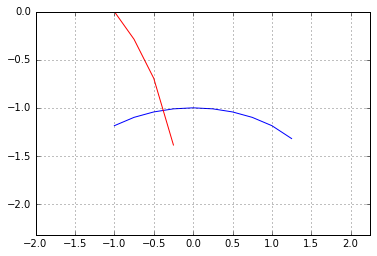

In [36]:
#введите данные в скобки через запятую
# число n определяет полиномом какой степени вы хотите прблизить
x = [-1+i*0.25 for i in range(10)]
y1 = []
y=[]
for i in x:
    if i<0:
        y1.append(log(-i))
x1 = [i for i in x if i<0]
for i in x:
    y.append((sin(i+math.pi/2))**(1/3)-2)
len(x1)    
graph(x, y, x1, y1)

# Перемножение матриц

In [4]:
def matumn(a,b):
    import numpy as np
    umn = []
    for i in range(len(a[0])):
        stroka = []
        for k in range(len(b[0])):
            el = 0
            for j in range(len(b)):
                el += a[i][j]*b[j][k]
            stroka.append(el)
        umn.append(stroka)
    return np.array(umn)

In [ ]:
matumn()

# ПМИ уравнения(спасибо денчик)

In [5]:
def fun(x):
    return -0.5*sin(x)-3.0
def MPI_resh(x0, n, f):
    x = x0
    for i in range(n):
        x = f(x0)
    return x 

In [ ]:
MPI_resh()

In [6]:
def MPI_oshibka(abs_proizvodnoy, x0, eps, f):
    n = 2+int((log((1.0-abs_proizvodnoy)*eps/fabs(x1-x0)))/log(abs_proizvodnoy))
    x = f(x0)
    for i in range(n):
        x = f(x)
    return x

In [ ]:
MPI_oshibka()

# вычислятор весовых коэффициентов для квадратур Гаусса-Кристофеля

In [7]:
import numpy as np
from math import sqrt, exp as sqrt, exp
j=100 
dx=2/j
с=[]
s=0
s1=0

#работает для двух узлов
#ОБЯЗАТЕЛЬНО приведение отрезка интегрирования к виду [-1;1]
#делается это с помощью линейной замены переменных

def p(x):
    res=exp(-x**2)
    return res
#в качестве нулей взяты нули полинома Лежандра для n=2 на отрезке [-1;1]
def h1(x):
    res=(x-sqrt(3)/3)/(2*sqrt(3)/3)
    return res

def h2(x):
    res=-(x-sqrt(3)/3)/(2*sqrt(3)/3)
    return res

for i in range(j):
    s=s+h1(-1+i*dx)*p(-1+i*dx)*dx
    s1=s1+h2(1-i*dx)*p(1-i*dx)*dx

print(s,s1)    

-0.7473490763560131 0.7462501380226892


# М. Симпсона и М. Трапеций с ошибками по Рунге и э.%20Ричардсона


In [20]:
j=8
a=0
b=2
h=(b-a)/j
#функцию вбивать руками здесь, дописывать перед функцией
def f(x):
    if x==0:
        res = 0
    else:
        res = x**(3/2)*cos(x)/sin(x)
    return res


#Метод трапеций
s=0
for i in range(j):
    
    s=s+(f(a+i*h)+f(a+(i+1)*h))*0.5*h

print('Метод трапеций, I=',s)
s_e=0
for i in range(math.ceil(j/2)):
    s_e=s_e+(f(a+i*2*h)+f(a+(i+1)*2*h))*0.5*2*h
#экстраполяция Ричардсона
s_extr=s+(s_e-s)/(1-2**2)
print('Уточнение экстраполяцией Ричардсона I*=',s_extr)
#Ошибка по правилу Рунге
err=abs((s_e-s)/(1-2**2))

print('Ошибка по правилу Рунге', err)
#Метод Симпсона
s1=0
for i in range(j):
    s1=s1+h*(f(a+i*h)+4*f(a+h*(i+0.5))+f(a+(i+1)*h))/6

print('Метод Симсона, I=', s1)

s1_e=0
for i in range(math.ceil(j/2)):
    s1_e=s1_e+2*h*(f(a+i*2*h)+4*f(a+2*h*(i+0.5))+f(a+(i+1)*2*h))/6
print('I(2h)=',s1_e)
#экстраполяция Ричардсона
s1_extr=s+(s1_e-s1)/(1-2**4)
print('Уточнение экстраполяцией Ричардсона I*=',s1_extr)
#Ошибка по правилу Рунге
err1=abs((s1_e-s1)/(1-2**4))

print('Ошибка по правилу Рунге',err1)

Метод трапеций, I= 0.501019170867348
Уточнение экстраполяцией Ричардсона I*= 0.5393053738424446
Ошибка по правилу Рунге 0.038286202975096516
Метод Симсона, I= 0.546184397183541
I(2h)= 0.5393053738424443
Уточнение экстраполяцией Ричардсона I*= 0.5014777724234212
Ошибка по правилу Рунге 0.0004586015560731127


In [13]:
h

0.25

In [6]:
h=0.25
h*(2*sum([(x*2*h)**(3/2)*cos(x*2*h)/sin(x*2*h) for x in range(1,4,1)])+2**(3/2)*cos(2)/sin(2))

0.3861605619420585